In [66]:
import numpy as np
import pandas
from sklearn.ensemble import RandomForestClassifier
import os
from sklearn.impute import KNNImputer
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [90]:
os.chdir(r'E:\NNSience\Dwarfs\Brown-Dwarfs-NN\data')

In [91]:
df = pandas.read_csv('data1.csv')
df.head()

,SpT,PS1gmag,e_PS1gmag,PS1rmag,PS1imag,e_PS1imag,PS1zmag,e_PS1zmag,PS1ymag,e_PS1ymag,...,e_Ksmag,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag,label
0,T4.5,NaN,NaN,NaN,NaN,NaN,19.17,0.01,17.42,0.01,...,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,L3.7INT-G,NaN,NaN,NaN,20.37,0.01,18.85,0.02,17.81,0.01,...,0.04,12.97,0.02,12.54,0.02,11.67,0.24,8.93,NaN,True
2,L1pec(blue),NaN,NaN,NaN,20.21,0.03,18.57,0.01,17.57,0.01,...,0.09,14.34,0.03,13.99,0.05,12.36,NaN,8.45,NaN,True
3,L5.5,NaN,NaN,NaN,22.30,0.08,20.30,0.04,19.31,0.03,...,0.22,14.82,0.03,14.57,0.06,11.73,NaN,8.10,NaN,True
4,L9,NaN,NaN,NaN,NaN,NaN,21.05,0.08,19.87,0.06,...,NaN,15.34,0.04,14.70,0.07,12.03,NaN,8.41,NaN,True


In [190]:
X = df.loc[:, 'PS1gmag':'e_W4mag']
y = df.loc[:, 'label']

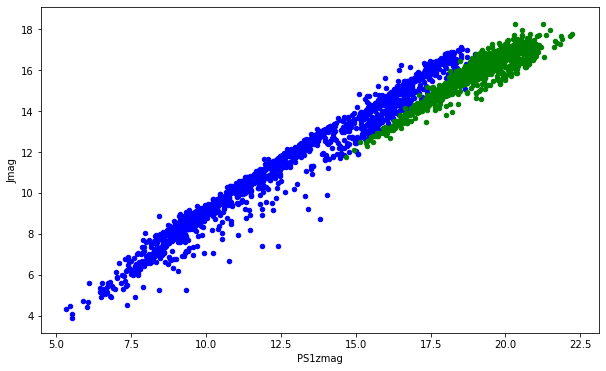

In [191]:
mag1='PS1zmag'
mag2='Jmag'
df1 = df[df['label'] == False]
fp=df1.plot.scatter(x=mag1, y=mag2, c='b',figsize=(10, 6))
df2 = df[df['label'] == True]
df2.plot.scatter(x=mag1, y=mag2, c='g', ax=fp)
plt.show()

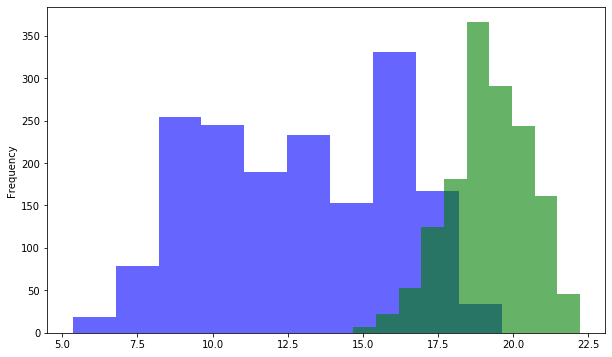

In [192]:
df1 = df[df['label'] == False].PS1zmag
fp=df1.plot.hist(alpha=0.6, color='b', figsize=(10, 6))
df2 = df[df['label'] == True].PS1zmag
df2.plot.hist(alpha=0.6, color='g')
plt.show()

In [193]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
X = imputer.fit_transform(X)
cols = df.loc[:, 'PS1gmag':'e_W4mag']
dx = pandas.DataFrame(data=X, columns=cols.columns)
dx.head()

,PS1gmag,e_PS1gmag,PS1rmag,PS1imag,e_PS1imag,PS1zmag,e_PS1zmag,PS1ymag,e_PS1ymag,Jmag,...,Ksmag,e_Ksmag,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag
0,20.973000,0.136733,22.253333,20.846667,0.063333,19.17,0.01,17.42,0.01,15.06,...,14.840000,0.120000,14.39,0.036667,12.956667,0.03,11.94,0.300000,8.623333,0.520000
1,22.443333,0.160000,22.450000,20.370000,0.010000,18.85,0.02,17.81,0.01,15.52,...,13.710000,0.040000,12.97,0.020000,12.540000,0.02,11.67,0.240000,8.930000,0.433333
2,22.067333,0.152100,22.260000,20.210000,0.030000,18.57,0.01,17.57,0.01,15.71,...,14.700000,0.090000,14.34,0.030000,13.990000,0.05,12.36,0.456667,8.450000,0.476667
3,22.661333,0.121433,22.940000,22.300000,0.080000,20.30,0.04,19.31,0.03,17.17,...,15.660000,0.220000,14.82,0.030000,14.570000,0.06,11.73,0.320000,8.100000,0.433333
4,22.661333,0.084433,22.580000,22.623333,0.140000,21.05,0.08,19.87,0.06,17.36,...,15.593333,0.113333,15.34,0.040000,14.700000,0.07,12.03,0.370000,8.410000,0.420000


In [302]:
X_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=123)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=123)

2008 2008


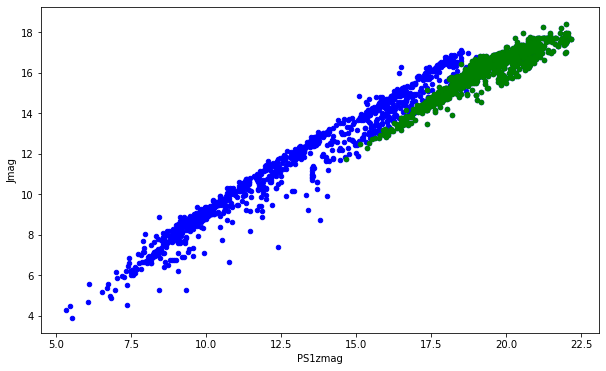

In [315]:
cols = df.loc[:, 'PS1gmag':'e_W4mag']
dxt = pandas.DataFrame(data=X_train, columns=cols.columns)
print(len(dxt), len(y_train))
mag1='PS1zmag'
mag2='Jmag'
df1 = dxt.loc[y_train.to_list()]
fp=dxt.plot.scatter(x=mag1, y=mag2, c='b',figsize=(10, 6))
df2 = dxt[y_train.to_list()]
df2.plot.scatter(x=mag1, y=mag2, c='g', ax=fp)
plt.show()

In [319]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(x_val)
corr_rf = matthews_corrcoef(y_pred_rf, y_val)

In [320]:
print(corr_rf)

0.9790524971762872


Test of learning rules on L&T data sample with Carnero Rosell et al.(2019) and Burningham et al.(2013)
Lots of objects are misclassified due to the lack of the data needed.

In [321]:
cols = df.loc[:, 'PS1gmag':'e_W4mag']
pos = pandas.DataFrame(data=x_val, columns=cols.columns)
mask =  (pos['PS1zmag']-pos['PS1ymag']>0.15) & (pos['PS1imag']-pos['PS1zmag']>1.27) & (pos['PS1ymag']-pos['Jmag']>1.6)
#mask =  (pos['PS1zmag']-pos['Jmag']>2.5)
corr_dr = matthews_corrcoef(mask, y_val)
print(corr_dr)


0.8088104073673155


In [322]:
from mlxtend.plotting import plot_decision_regions

In [367]:
features = [3,9]

dict_v = {i:[np.quantile(X_train[:,i], 0.25), np.quantile(X_train[:,i], 0.5), np.quantile(X_train[:,i], 0.75),np.quantile(X_train[:,i], 0.9)] for i in range(len(X_train[0])) if i not in features}
dict_vv = {i:X_train.std(0)[i] for i in range(len(X_train[0])) if i not in features}

C:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)
C:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)


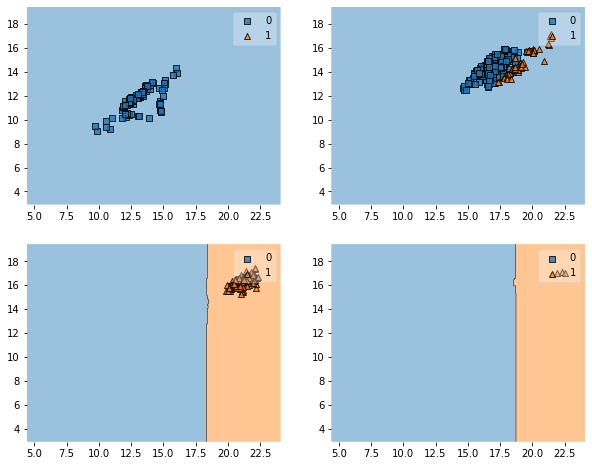

In [371]:
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for i, ax in enumerate(axarr.flat):
    plot_decision_regions(X_train, np.array([int(i) for i in y_train.to_list()]), clf=model_rf,
                      feature_index=features,
                      filler_feature_values={x:dict_v[x][i] for x in range(len(X_train[0])) if x not in features},
                      filler_feature_ranges=dict_vv,ax=ax)